In [4]:
import pandas as pd
import preprocessing as pp
import utils as utils
from sklearn import tree
import numpy as np
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [5]:
import random
seed = 100
np.random.seed(seed)
random.seed(seed)

In [6]:
X, y = utils.importar_datos()

### Metricas finales

Se eligió el [Modelo 3](#Modelo-3) en base a los resultados obtenidos mediante `cross_validation`.

In [20]:
preprocessor = pp.PreprocessingOHE()
model = tree.DecisionTreeClassifier(random_state=pp.RANDOM_STATE, 
                               max_depth=13, 
                               min_samples_leaf=6, min_samples_split=2,max_features=6)

In [21]:
pipeline = Pipeline([("preprocessor", preprocessor), 
                     ("model", model)
                     ])

AUC_ROC,Accuracy,Precision,Recall,F1 Score
0.875652,0.851240,0.833333,0.760870,0.795455


Matriz de confusión:


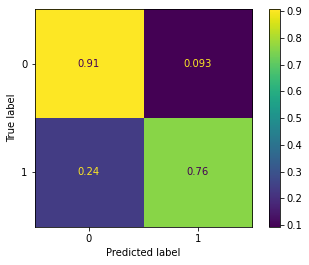

In [22]:
pipeline = utils.entrenar_y_realizar_prediccion_final_con_metricas(X, y, pipeline)

Como puede verse, la métrica objetivo AUC-ROC tiene un buen resultado en este modelo. Lo que no se logra es un buen resultado de Recall y eso puede verse también en la matriz de confusión: De los casos verdaderamente positivos el modelo selecciona como negativos al 24%, esa tasa de Falsos Negativos perjudica el resultado de todas las métricas, pero principalmente al Recall (recordando que `Recall = TP / (TP + FN)`).

### Predicción HoldOut

In [23]:
utils.predecir_holdout_y_generar_csv(pipeline, 'Predicciones/1-ArbolDeDecision-OHE.csv')